### [About the dataset:]() 
This dataset contains 1338 rows of insured data, where the Insurance charges are given against the following attributes of the insured: Age, Sex, BMI, Number of Children, Smoker and Region. The attributes are a mix of numeric and categorical variables.
There are no missing or undefined values in the dataset.

##### Goal: Our goal is to find the linear model to estimate the charges with appropriate explanatory variables

## [importing the libraries]()

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

## [data collection and analysis]()

In [70]:
#loading the data from csv file to pandas DataFrame
insurance_dataset = pd.read_csv('Downloads/insurance.csv')

In [71]:
#first five rows of the Dataset
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [72]:
#last five rows of the Dataset
insurance_dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [73]:
 #number of rows and columns
insurance_dataset.shape

(1338, 7)

We have $1338$ observations and $7$ variables.

In [74]:
#getting some information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### [categorical Features:]()
- sex
- smoker
- region

In [75]:
#checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no missing values in the insurance dataset.

## [Data Analysis]()

In [76]:
#statistical measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


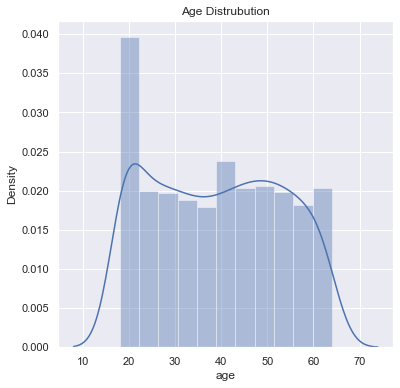

In [77]:
#distribution of the age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distrubution')
plt.show()

From the plot of age distribution we observe that the mostly age lies between 20 to 60.

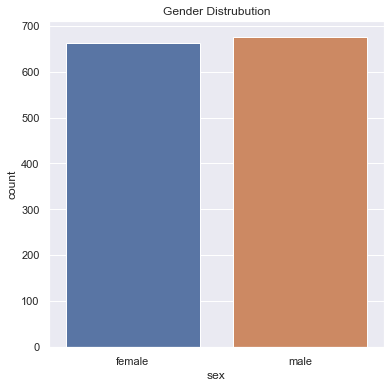

In [78]:
#Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Gender Distrubution')
plt.show()

we have almost same number of male and female.

In [79]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

We  have $676$ male and $662$ females in the observations.

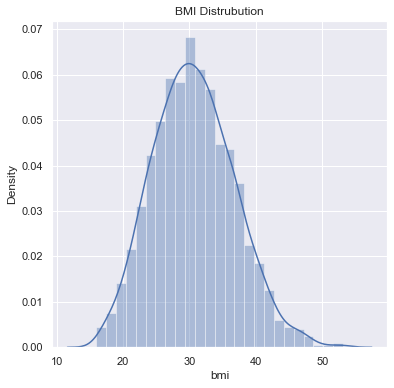

In [80]:
#distribution for the 'bmi' value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distrubution')
plt.show()

The plot of the bmi is normally distributed.

### [Normal BMI range --> 18.5 to 24.9]()

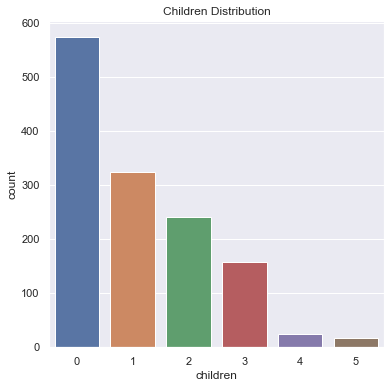

In [81]:
#children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children Distribution')
plt.show()

In [82]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

From the count table it is clearly observe that most of the data observation have the children number between 0 to 3.

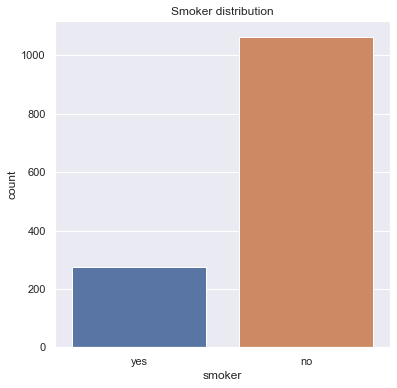

In [83]:
#smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('Smoker distribution')
plt.show()

In [84]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

There is a large number of peoples in observation who don't smoke.
$1064$ data observation does not smoke and rest $274$ do smoke.

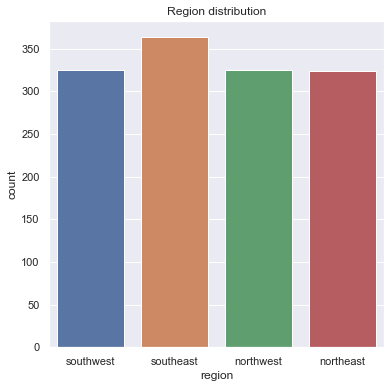

In [85]:
#region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('Region distribution')
plt.show()

In [86]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

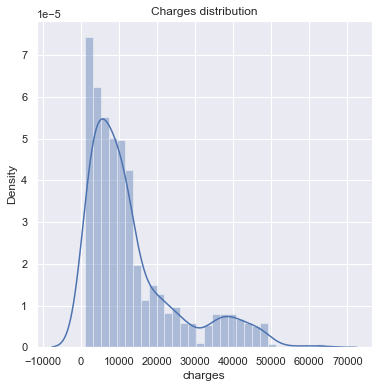

In [87]:
#charges column
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges distribution')
plt.show()

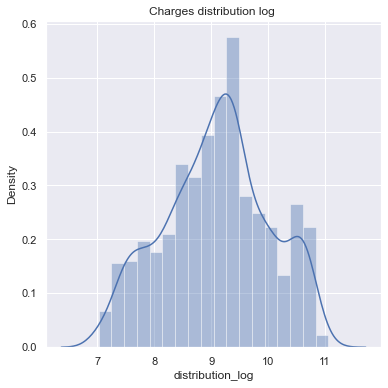

In [88]:
insurance_dataset['distribution_log'] = np.log(insurance_dataset['charges'])
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['distribution_log'])
plt.title('Charges distribution log ')
plt.show()

## [Plotting Correlation (Pair Plot)]()

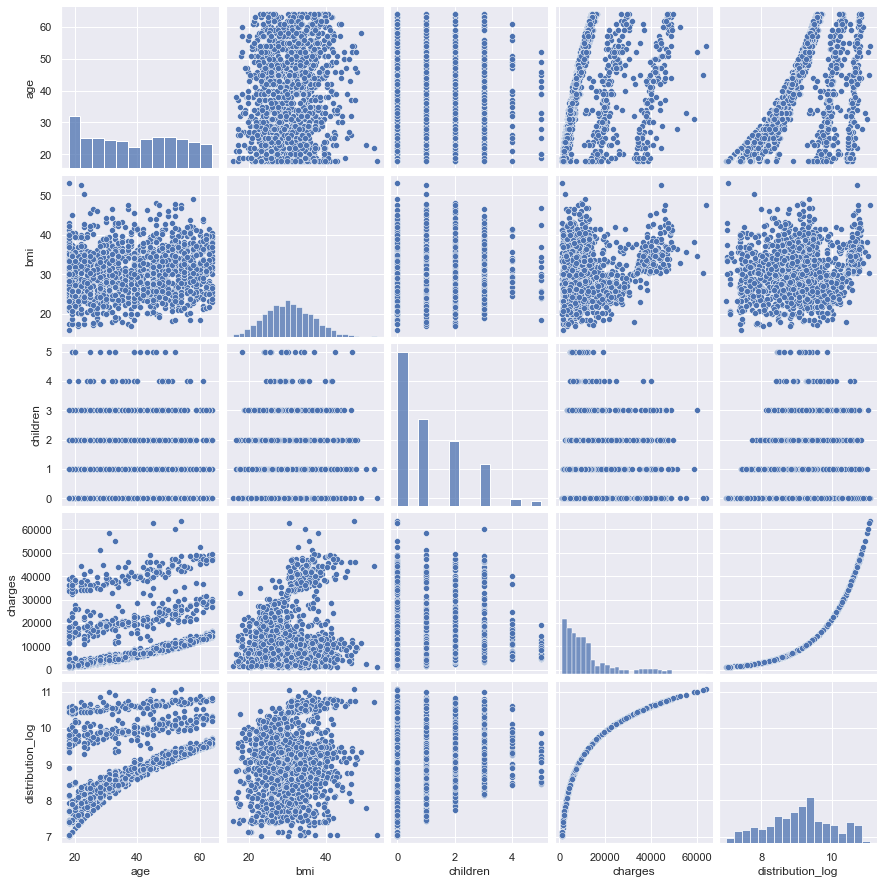

In [89]:
sns.set_style(style = 'darkgrid')
sns.pairplot(insurance_dataset)

## [data pre-processing]()

### [encoding the categorical features]()

In [90]:
# encoding the 'sex' column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

# encoding the 'smoker' column
insurance_dataset.replace({'smoker':{'yes':1,'no':0}}, inplace=True)

# encoding the 'region' column
insurance_dataset = pd.get_dummies(insurance_dataset, drop_first = True)

In [91]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,charges,distribution_log,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,9.734176,0,0,1
1,18,0,33.770,1,0,1725.55230,7.453302,0,1,0
2,28,0,33.000,3,0,4449.46200,8.400538,0,1,0
3,33,0,22.705,0,0,21984.47061,9.998092,1,0,0
4,32,0,28.880,0,0,3866.85520,8.260197,1,0,0


### [splitting the Features and Target]()

In [92]:
X = insurance_dataset.drop(columns={'distribution_log','charges'},axis=1)
Y = insurance_dataset['charges']

In [93]:
#print(X)
X.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,0,0,1
1,18,0,33.770,1,0,0,1,0
2,28,0,33.000,3,0,0,1,0
3,33,0,22.705,0,0,1,0,0
4,32,0,28.880,0,0,1,0,0


In [94]:
print(Y)
#Y.head()

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


### [Splitting the data into Training data & Testing data]()

In [95]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [96]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 8) (1070, 8) (268, 8)


## [Model 1]()

In [97]:
X_train1 = sm.add_constant(X_train)

In [98]:
X_train1.head()

,const,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
882,1.0,21,1,22.135,0,0,0,0,0
505,1.0,37,0,30.875,3,0,1,0,0
798,1.0,58,1,33.100,0,0,0,0,1
792,1.0,22,1,23.180,0,0,0,0,0
201,1.0,48,1,32.230,1,0,0,1,0


In [99]:
ols1 = sm.OLS(Y_train,X_train1)
ols_fit1 = ols1.fit()
ols_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     402.2
Date:                Fri, 07 Oct 2022   Prob (F-statistic):          5.88e-315
Time:                        01:17:38   Log-Likelihood:                -10828.
No. Observations:                1070   AIC:                         2.167e+04
Df Residuals:                    1061   BIC:                         2.172e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -1.18e+04   1133.175    -10.410      0.000    -1.4e+04   -9572.858
age                251.2257     13.421     18.719      0.000     224.891     277.561
sex                 37.1224    371.162      0.100      0.920    -691.173     765.418
bmi                332.8227     32.213     10.332      0.000     269.614     396.031
children           587.9253    153.458      3.831      0.000     286.810     889.041
smoker            2.391e+04    459.165     52.078      0.000     2.3e+04    2.48e+04
region_northwest  -379.1900    532.269     -0.712      0.476   -1423.609     665.229
region_southeast  -784.4844    532.034     -1.474      0.141   -1828.443     259.474
region_southwest  -947.2382    532.257     -1.780      0.075   -1991.634      97.157
==============================================================================
Omnibus:                      241.237   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              580.065
Skew:                           1.203   Prob(JB):                    1.10e-126
Kurtosis:                       5.687   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
ols_fit1.params

const              -11796.376076
age                   251.225664
sex                    37.122401
bmi                   332.822714
children              587.925310
smoker              23912.345230
region_northwest     -379.189963
region_southeast     -784.484360
region_southwest     -947.238184
dtype: float64

### [Checking Multicollinearity]()

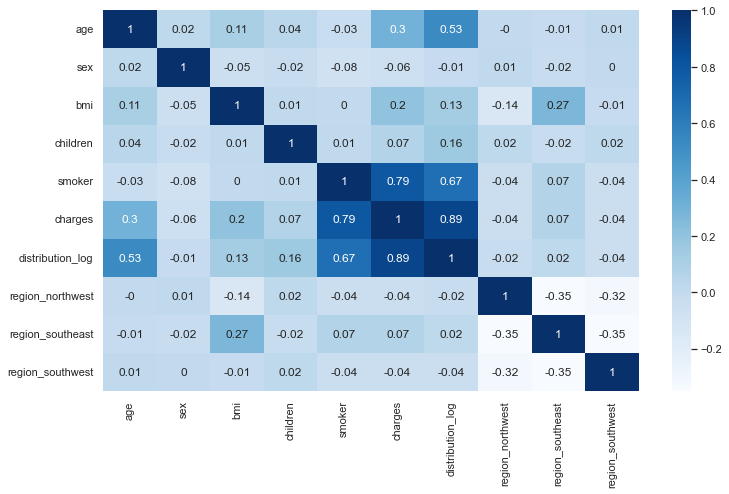

In [101]:
# plotting the correlation matrix to check whether there is a correlation between explanatory variables

correlation_matrix = insurance_dataset.corr().round(2)
correlation_matrix
sns.heatmap(data = correlation_matrix,annot=True,cmap="Blues")
sns.set(rc = {'figure.figsize':(12,7)})

From the correlation matrix, it is clear that there is no strong correlation between any explanotary variables.
But from just by looking at correlation between any two explanotory variable we can not state that there is no multicollinearity.
It may be possible that more that two variable have a relationship.
For this we are using VIF(variance inflation factor) method to check multicollinearity

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [103]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
2,bmi,11.34
0,age,7.99
6,region_southeast,2.28
7,region_southwest,2.00
1,sex,1.89
5,region_northwest,1.89
3,children,1.84
4,smoker,1.25


since, the VIF of all the variables are less than 10. So, there is no multicollinearity between the regressors.

## [Model 2]()

In [104]:
# we are dropping the "sex" variable form the X_train because it has high P-value 
X_train.drop(columns = ['sex'],axis=1,inplace=True)

In [105]:
X_train.head()

,age,bmi,children,smoker,region_northwest,region_southeast,region_southwest
882,21,22.135,0,0,0,0,0
505,37,30.875,3,0,1,0,0
798,58,33.100,0,0,0,0,1
792,22,23.180,0,0,0,0,0
201,48,32.230,1,0,0,1,0


In [106]:
X_train2 = sm.add_constant(X_train)

In [107]:
X_train2.head()

,const,age,bmi,children,smoker,region_northwest,region_southeast,region_southwest
882,1.0,21,22.135,0,0,0,0,0
505,1.0,37,30.875,3,0,1,0,0
798,1.0,58,33.100,0,0,0,0,1
792,1.0,22,23.180,0,0,0,0,0
201,1.0,48,32.230,1,0,0,1,0


In [108]:
ols2 = sm.OLS(Y_train,X_train2)
ols_fit2 = ols2.fit()
ols_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     460.1
Date:                Fri, 07 Oct 2022   Prob (F-statistic):          2.66e-316
Time:                        01:17:39   Log-Likelihood:                -10828.
No. Observations:                1070   AIC:                         2.167e+04
Df Residuals:                    1062   BIC:                         2.171e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.177e+04   1103.309    -10.669      0.000   -1.39e+04   -9605.835
age                251.2430     13.414     18.730      0.000     224.922     277.564
bmi                332.5540     32.086     10.364      0.000     269.595     395.513
children           587.8420    153.384      3.832      0.000     286.871     888.813
smoker            2.391e+04    457.911     52.214      0.000     2.3e+04    2.48e+04
region_northwest  -378.4525    531.969     -0.711      0.477   -1422.283     665.378
region_southeast  -783.0470    531.592     -1.473      0.141   -1826.137     260.043
region_southwest  -945.9936    531.863     -1.779      0.076   -1989.616      97.629
==============================================================================
Omnibus:                      241.213   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              579.880
Skew:                           1.203   Prob(JB):                    1.20e-126
Kurtosis:                       5.686   Cond. No.                         313.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
1,bmi,11.06
0,age,7.90
5,region_southeast,2.27
6,region_southwest,1.99
4,region_northwest,1.88
2,children,1.84
3,smoker,1.25


since the VIF of all the features are less than 10. So, there is now no multicollinearity between explanatory variables.

## [Model 3]()

In [110]:
# we are dropping the "region_northwest" variable form the X_train because it has high P-value 
X_train.drop(columns = ['region_northwest'],axis=1,inplace=True)
X_train.head()

,age,bmi,children,smoker,region_southeast,region_southwest
882,21,22.135,0,0,0,0
505,37,30.875,3,0,0,0
798,58,33.100,0,0,0,1
792,22,23.180,0,0,0,0
201,48,32.230,1,0,1,0


In [111]:
X_train3 = sm.add_constant(X_train)

In [112]:
X_train3.head()

,const,age,bmi,children,smoker,region_southeast,region_southwest
882,1.0,21,22.135,0,0,0,0
505,1.0,37,30.875,3,0,0,0
798,1.0,58,33.100,0,0,0,1
792,1.0,22,23.180,0,0,0,0
201,1.0,48,32.230,1,0,1,0


In [113]:
ols3 = sm.OLS(Y_train,X_train3)
ols_fit3 = ols3.fit()
ols_fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     536.9
Date:                Fri, 07 Oct 2022   Prob (F-statistic):          1.42e-317
Time:                        01:17:39   Log-Likelihood:                -10828.
No. Observations:                1070   AIC:                         2.167e+04
Df Residuals:                    1063   BIC:                         2.171e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.196e+04   1071.102    -11.164      0.000   -1.41e+04   -9856.580
age                251.3472     13.410     18.743      0.000     225.034     277.660
bmi                332.4878     32.078     10.365      0.000     269.544     395.432
children           584.1966    153.263      3.812      0.000     283.464     884.929
smoker            2.392e+04    457.693     52.254      0.000     2.3e+04    2.48e+04
region_southeast  -595.2730    461.330     -1.290      0.197   -1500.493     309.947
region_southwest  -757.6912    461.217     -1.643      0.101   -1662.690     147.308
==============================================================================
Omnibus:                      240.339   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              575.062
Skew:                           1.201   Prob(JB):                    1.34e-125
Kurtosis:                       5.670   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
1,bmi,9.90
0,age,7.83
2,children,1.83
4,region_southeast,1.70
5,region_southwest,1.53
3,smoker,1.25


## [Model 4]()

In [115]:
# we are dropping the "region_southeast" variable form the X_train because it has high P-value 
X_train.drop(columns = ['region_southeast'],axis=1,inplace=True)
X_train.head()

,age,bmi,children,smoker,region_southwest
882,21,22.135,0,0,0
505,37,30.875,3,0,0
798,58,33.100,0,0,1
792,22,23.180,0,0,0
201,48,32.230,1,0,0


In [116]:
X_train4 = sm.add_constant(X_train)

In [117]:
X_train4.head()

,const,age,bmi,children,smoker,region_southwest
882,1.0,21,22.135,0,0,0
505,1.0,37,30.875,3,0,0
798,1.0,58,33.100,0,0,1
792,1.0,22,23.180,0,0,0
201,1.0,48,32.230,1,0,0


In [118]:
ols4 = sm.OLS(Y_train,X_train4)
ols_fit4 = ols4.fit()
ols_fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     643.6
Date:                Fri, 07 Oct 2022   Prob (F-statistic):          1.22e-318
Time:                        01:17:39   Log-Likelihood:                -10829.
No. Observations:                1070   AIC:                         2.167e+04
Df Residuals:                    1064   BIC:                         2.170e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.184e+04   1067.178    -11.090      0.000   -1.39e+04   -9741.175
age                251.9593     13.406     18.795      0.000     225.655     278.264
bmi                320.6103     30.739     10.430      0.000     260.295     380.926
children           590.1719    153.241      3.851      0.000     289.483     890.861
smoker            2.389e+04    457.274     52.238      0.000     2.3e+04    2.48e+04
region_southwest  -538.9587    429.069     -1.256      0.209   -1380.877     302.960
==============================================================================
Omnibus:                      239.208   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              569.520
Skew:                           1.198   Prob(JB):                    2.14e-124
Kurtosis:                       5.652   Cond. No.                         298.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
1,bmi,8.53
0,age,7.78
2,children,1.83
4,region_southwest,1.32
3,smoker,1.25


## [Model 5]()

In [120]:
# we are dropping the "region_southwest" variable form the X_train because it has high P-value 
X_train.drop(columns = ['region_southwest'],axis=1,inplace=True)
X_train.head()

,age,bmi,children,smoker
882,21,22.135,0,0
505,37,30.875,3,0
798,58,33.100,0,0
792,22,23.180,0,0
201,48,32.230,1,0


In [121]:
X_train5 = sm.add_constant(X_train)

In [122]:
X_train5.head()

,const,age,bmi,children,smoker
882,1.0,21,22.135,0,0
505,1.0,37,30.875,3,0
798,1.0,58,33.100,0,0
792,1.0,22,23.180,0,0
201,1.0,48,32.230,1,0


In [123]:
ols5 = sm.OLS(Y_train,X_train5)
ols_fit5 = ols5.fit()
ols_fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     803.6
Date:                Fri, 07 Oct 2022   Prob (F-statistic):          8.87e-320
Time:                        01:17:40   Log-Likelihood:                -10830.
No. Observations:                1070   AIC:                         2.167e+04
Df Residuals:                    1065   BIC:                         2.170e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.194e+04   1064.436    -11.214      0.000    -1.4e+04   -9847.508
age          251.8860     13.409     18.785      0.000     225.575     278.197
bmi          319.7416     30.739     10.402      0.000     259.425     380.058
children     586.8084    153.259      3.829      0.000     286.084     887.532
smoker       2.39e+04    457.311     52.259      0.000     2.3e+04    2.48e+04
==============================================================================
Omnibus:                      240.025   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              571.248
Skew:                           1.202   Prob(JB):                    9.02e-125
Kurtosis:                       5.652   Cond. No.                         297.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
1,bmi,8.33
0,age,7.77
2,children,1.82
3,smoker,1.25


## [checking the R square on the test data now ]()

In [125]:
## checking the R square on the test data now
X_test.drop(columns = ['region_northwest','region_southeast','region_southwest','sex'],axis=1,inplace=True)
X_test1 = sm.add_constant(X_test)
ols = sm.OLS(Y_test,X_test1)
ols_fit = ols.fit()
ols_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     194.6
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           2.55e-77
Time:                        01:17:45   Log-Likelihood:                -2718.7
No. Observations:                 268   AIC:                             5447.
Df Residuals:                     263   BIC:                             5465.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.284e+04   2037.877     -6.302      0.000   -1.69e+04   -8831.086
age          281.4906     26.025     10.816      0.000     230.247     332.734
bmi          333.3948     60.433      5.517      0.000     214.400     452.389
children      -9.1426    317.173     -0.029      0.977    -633.664     615.379
smoker      2.345e+04    940.715     24.928      0.000    2.16e+04    2.53e+04
==============================================================================
Omnibus:                       71.792   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.918
Skew:                           1.283   Prob(JB):                     2.54e-36
Kurtosis:                       5.845   Cond. No.                         271.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## [K-fold Cross Validation Technique]()

In [126]:
# Using k=10 in K-fold Cross Validation
from sklearn.model_selection import cross_val_score
linear_reg = LinearRegression()
X.drop(columns = ['region_northwest','region_southeast','region_southwest','sex'],axis=1,inplace=True)
cvs = cross_val_score(linear_reg,X,Y,cv=10)

print('Accuracy: {:.2f} %'.format(cvs.mean()*100))
print('Standard Deviation {:.2f} %'.format(cvs.std()*100))

Accuracy: 74.47 %
Standard Deviation 4.23 %


This shows that the standard deviation is low and so the predicted linear regression model is the best choice for the dataset and the accuracy of the model is 74.47% with a standard deviation of 4.23%.

# [Interpretation of Model]()

In [127]:
# The coefficients and intercept of the regression model are
parameters = ols_fit5.params

In [128]:
print(f'The coefficients of the regression model are \n {parameters[1:]}')

The coefficients of the regression model are 
 age           251.886008
bmi           319.741632
children      586.808417
smoker      23898.470763
dtype: float64


In [129]:
print(f'The intercept of the regression model are \n {parameters[:1]}')

The intercept of the regression model are 
 const   -11936.137753
dtype: float64


## [Regression Line of the Model]()

### [charges = (-11936.137753) +  (251.886008) age + (319.741632) bmi +  (586.808417) children + (23898.470763) smoker]() 

# [Distribution of Residuals]()

In [131]:
X_test1.head()

,const,age,bmi,children,smoker
17,1.0,23,23.845,0,0
1091,1.0,55,29.830,0,0
273,1.0,50,27.455,1,0
270,1.0,18,29.370,1,0
874,1.0,44,21.850,3,0


In [132]:
Y_pred = ols_fit5.predict(X_test1)
Y_pred

17       1481.479637
1091    11455.485559
273     10023.477561
270      2575.430529
874      7893.626502
            ...     
232     -1458.902558
323     15513.185810
1337    36622.268729
1066    13251.172909
966     33910.130009
Length: 268, dtype: float64

In [133]:
residual = Y_test - Y_pred

<AxesSubplot:ylabel='Density'>

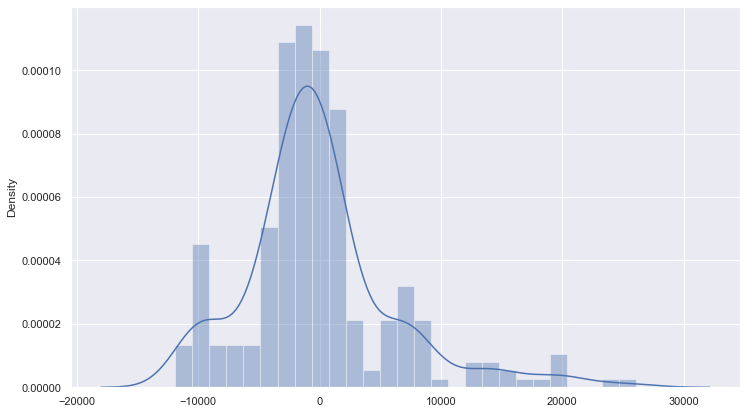

In [134]:
# Distribution  plot of residuals
sns.distplot(residual)

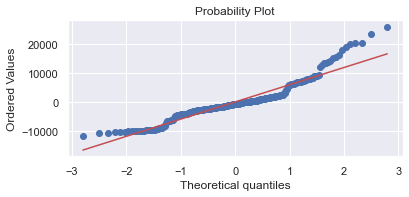

In [135]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [136]:
np.mean(residual)

-50.021900285711226

# [Homoscedasticity]()

The linear regression analysis is made on the assumption that the residuals are homoscedastic, that is the residuals have almost same variance across the regression line. This can be checked using a scatter plot for the residuals against the predicted values.

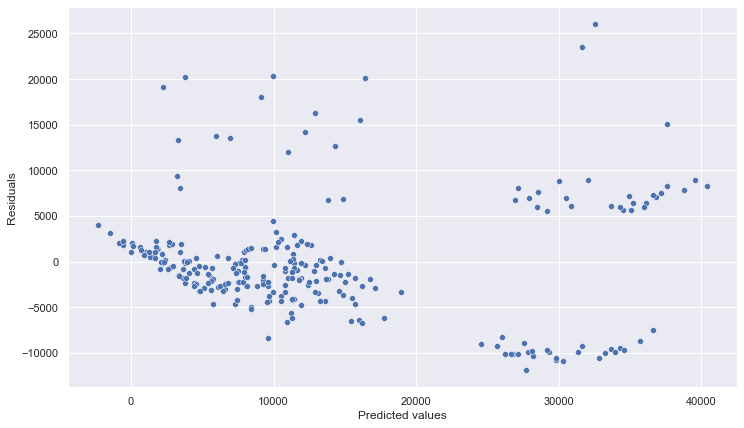

In [137]:
# plotting the scatter plot between predicted Values and Residuals
sns.scatterplot(Y_pred,residual)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

### plot doesn't give any strong evidence about the homoscedasticity of the data.now we have use some appropriate tests to check the homoscedasticity.Or further if this is not a significant model to estimate then charges the we have to fit some other model like using polynomial regression

In [138]:
# calculating correlation coefficient between Predicted Values and Residuals
Y_pred.corr(residual)

-0.01084500895922145

# [Multicollinearity]()

In [139]:
X.head()

,age,bmi,children,smoker
0,19,27.900,0,1
1,18,33.770,1,0
2,28,33.000,3,0
3,33,22.705,0,0
4,32,28.880,0,0


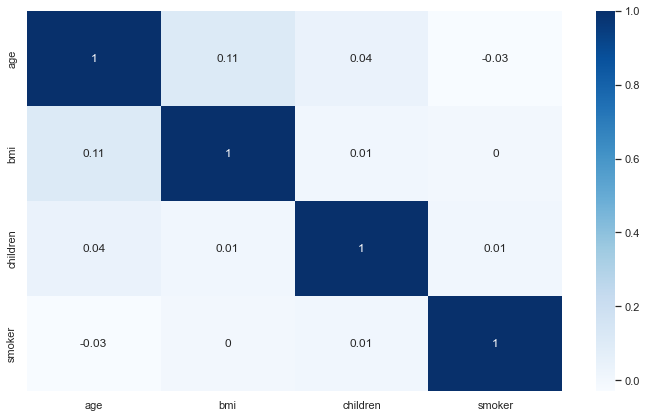

In [140]:
correlation_matrix = X.corr().round(2)
correlation_matrix
sns.heatmap(data = correlation_matrix,annot=True,cmap="Blues")
sns.set(rc = {'figure.figsize':(12,7)})

From the above correlation matrix it is clear that there is no correlation between any of the explanatory variables in a final Model of our regression line.

In [141]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
1,bmi,8.04
0,age,7.54
2,children,1.80
3,smoker,1.25


All the VIF(variance inflation factor) of a explanatory variables in a final Model are less than 10.
So, there is no multicollinearity in a regressors.

# [Conclusion.]()

The predicted model is found to be $75.43$% accurate.

The inferences that can be drawn from the linear regression model are,

1) Increase of one unit in Age results in an increase of $251.886008 of charges on an average.

2) Increase of one unit in bmi results in an increase of $319.741632 of charges on an average.

3) Increase of one unit in children results in an increase of $586.808417 of charges on an average.

4) Increase of one unit in smoker results in an increase of $23898.470763 of charges on an average.